In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv("house_price.csv") #보스턴 데이터 불러오기

In [2]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


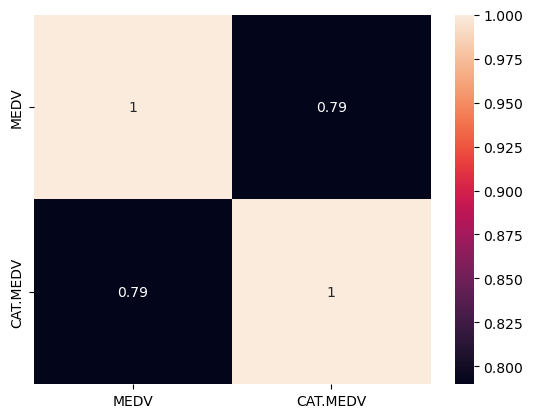

In [3]:
sns.heatmap(boston[['MEDV', 'CAT.MEDV']].corr(),annot = True)
plt.show()

In [4]:
boston.drop(labels="CAT.MEDV",axis=1,inplace=True)

CAT.MEDV는 MEDV에서 파생된 칼럼이고, 변수간 상관관계가 크기 때문에 drop!

In [5]:
X = boston.drop(labels='MEDV',axis=1)
y = boston["MEDV"]

MEDV가 종속변수!

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [7]:
from sklearn.linear_model import LinearRegression
#lr_skl 변수에 LinearRegression()을 저장하세요.
lr_skl = LinearRegression()

#방금 나눈 데이터중 train데이터를 fit시켜주세요.
lr_skl.fit(X_train,y_train)

#이번에는 test데이터를 이용해 predict을 하고 그 결과를 y_pred_skl변수에 저장하세요
y_pred_skl = lr_skl.predict(X_test)

#결과 확인
y_pred_skl 

array([22.99953402, 15.706379  , 22.29592989, 13.34992498, 37.11777273,
       19.7078679 , 27.13657192, 29.35219905, 23.87820479, 33.46710697,
       39.50706943, 26.63125725, 17.36641987, 41.33101013, 33.09993578,
       23.91720481, 22.89999026,  8.85729005,  9.49845642, 33.57119488,
       21.44516304, 13.54821843, 13.15940319, 30.97711782, 14.93612064,
       18.92423389, 22.09352787, 24.91931253, 23.10403675, 17.27488751,
       19.67411009, 32.2199856 , 13.57268724, 24.80751454, 28.7213306 ,
       16.19190018, 26.97303266, 17.7419512 , 32.97459393, 26.88064999,
       20.39422987, 28.56392722, 30.86717514, 30.62979238,  9.39242762,
       29.20369436, 21.10590216, 24.70688192, 24.19682076, 30.32975006,
       17.37366609, 40.86249166, 20.07817094, 31.07046368, 18.43723215,
       22.67079393, 23.48684317, 23.45997532, 34.36027104, 22.97180255,
       35.15072629, 19.66052256, 13.23327891, 25.23625621, 25.65754011,
       21.80906739, 22.53832401, 26.89837071, 21.91440946,  3.05

In [10]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl) #실측값,예측값 순서로 넣어줍니다.
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing R2: {:.3f}'.format(test_r2_skl))

Testing MSE: 23.300
Testing MAE: 3.519
Testing R2: 0.635


1차적으로 추가적인 칼럼 삭제 없이 sklearn 모델을 활용해서 학습하고 예측 결과를 출력해봤습니다.

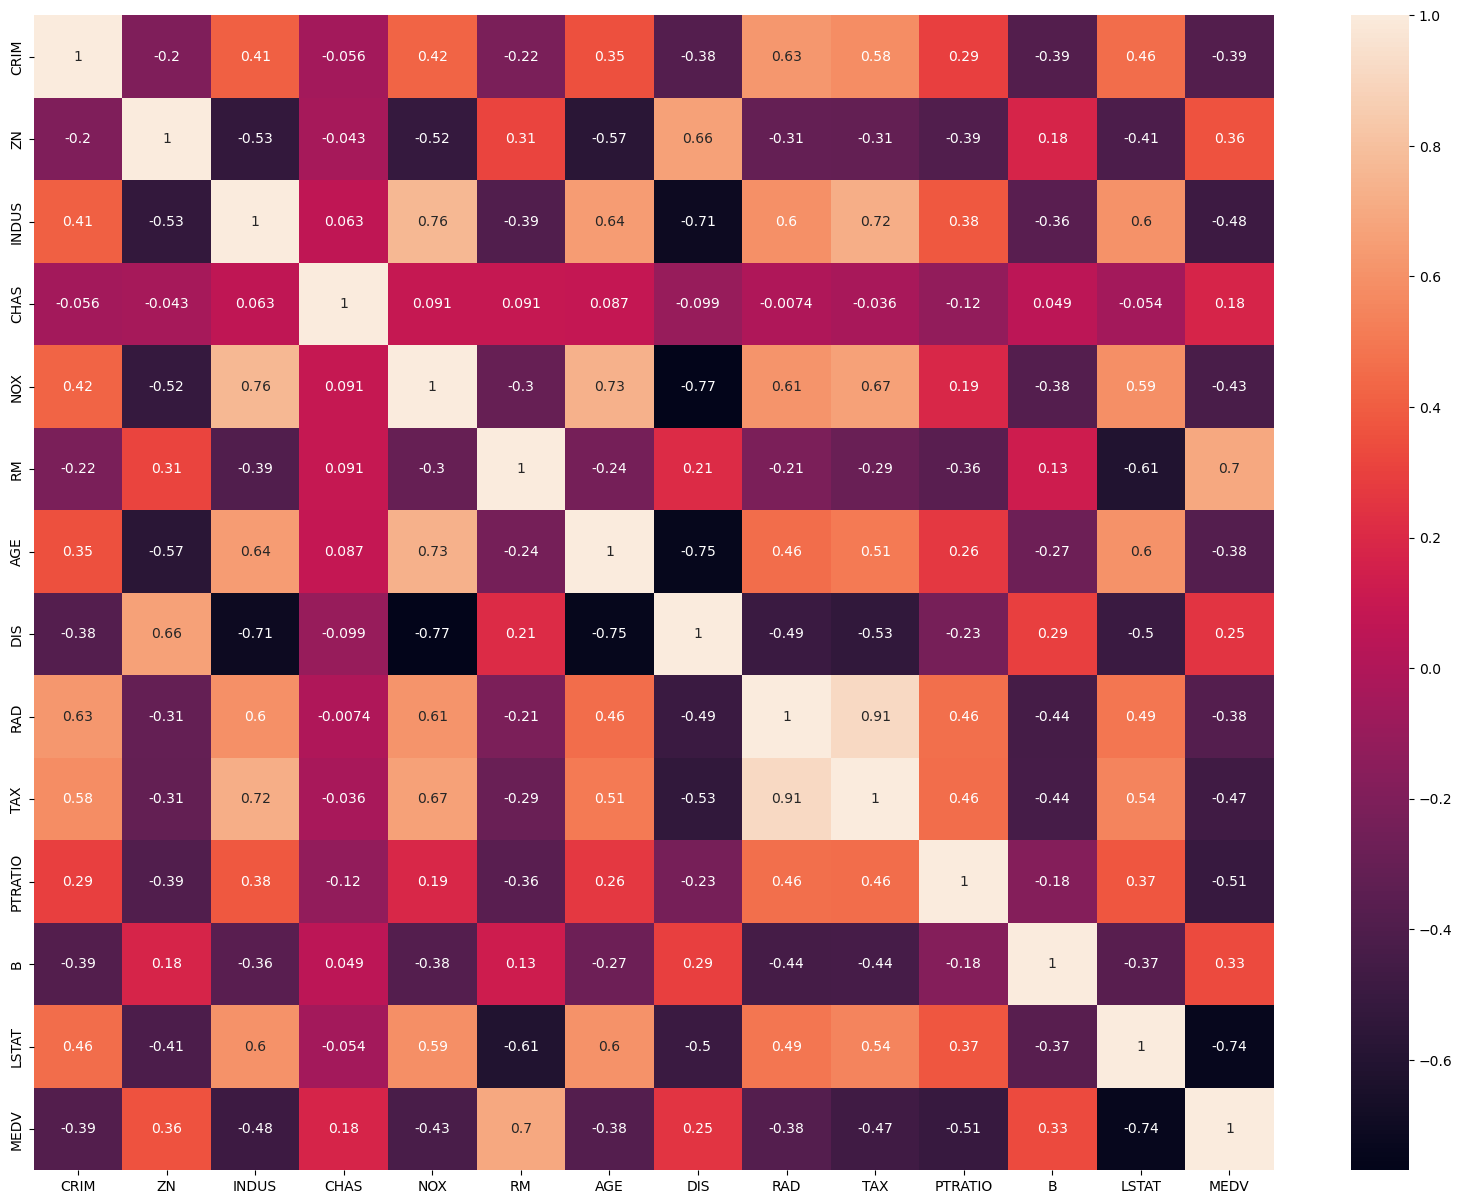

In [11]:
plt.figure(figsize=(20,15))

#히트맵 찍기
sns.heatmap(boston.corr(), annot=True)
plt.show()

In [12]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


칼럼 삭제하기 위해 상관계수들을 보며 다중공산성을 확인해보았습니다!

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재
def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [14]:
vif(X.drop('PTRATIO',axis=1))

   Features        VIF
0      CRIM   2.099345
1        ZN   2.451624
2     INDUS  14.275283
3      CHAS   1.142167
4       NOX  73.894171
5        RM  60.598846
6       AGE  21.361234
7       DIS  12.221605
8       RAD  15.159162
9       TAX  59.301541
10        B  18.614751
11    LSTAT  10.138324


In [15]:
vif(X.drop(['PTRATIO','NOX'],axis=1))

   Features        VIF
0      CRIM   2.097537
1        ZN   2.449661
2     INDUS  13.150904
3      CHAS   1.138277
4        RM  41.406746
5       AGE  19.889623
6       DIS  12.032952
7       RAD  15.155012
8       TAX  57.720347
9         B  18.396072
10    LSTAT   9.207840


In [16]:
vif(X.drop(['PTRATIO','NOX', 'TAX'],axis=1))

  Features        VIF
0     CRIM   2.097466
1       ZN   2.375219
2    INDUS   9.290080
3     CHAS   1.118613
4       RM  39.069063
5      AGE  19.780944
6      DIS  11.817803
7      RAD   4.965633
8        B  18.289917
9    LSTAT   9.046248


In [17]:
vif(X.drop(['PTRATIO','NOX', 'TAX','RM'],axis=1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


VIF를 통해서도 다중공산성을 확인해보고, VIF가 높은 칼럼들부터 하나씩 삭제해보았습니다!

In [ ]:
boston.drop(labels=['PTRATIO','NOX', 'TAX','RM'],axis=1,inplace=True)     #위에서 확인한 것처럼 다중공선성이 높은 변수 세가지를 지우고 inplace = True 해줬습니다

X = boston.drop(labels='MEDV',axis=1)
y = boston["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

from sklearn.linear_model import LinearRegression       #scikit-learn으로 선형회귀 모델 생성 및 학습
lr_skl = LinearRegression() # default가 fit_intercept=True
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)
y_pred_skl

array([22.04688345, 18.27603596, 24.69351121, 14.41735102, 32.16590033,
       19.20948201, 28.35436279, 32.15939948, 23.06508314, 32.02570113,
       34.8232227 , 24.09973761, 15.61680613, 34.92774762, 29.71788813,
       21.43884362, 21.012137  ,  7.81418371,  5.40522296, 33.36841459,
       24.31564635, 14.73314925, 15.9621363 , 30.55855357, 16.08951378,
       15.9867188 , 18.30113445, 25.87061806, 25.60774122, 16.26966358,
       18.21225602, 35.46743545, 14.52658139, 23.48824658, 30.98527393,
       18.53318813, 26.5807713 , 16.63246191, 31.60014972, 25.24306014,
       21.48530683, 26.13725942, 33.34062957, 28.02750481,  5.14317288,
       28.33163782, 23.66538728, 23.1965895 , 23.64090303, 30.60130107,
       16.90890131, 32.81908958, 20.00344369, 31.16158647, 14.82774457,
       20.61891658, 24.80061773, 22.08360109, 32.33680168, 25.83832034,
       32.00244115, 24.44561059, 10.77609207, 23.21468868, 25.48436057,
       25.42489826, 27.07064342, 28.02560732, 22.61093154,  2.97

In [21]:
print(mean_squared_error(y_test, y_pred_skl))

33.0991880455891


In [22]:
print(mean_absolute_error(y_test, y_pred_skl))

4.207768243933811


In [23]:
print(r2_score(y_test, y_pred_skl))

0.4818236917879041


In [24]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred_skl)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred_skl)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_pred_skl)))

Testing MSE: 33.099
Testing MAE: 4.208
Testing R2: 0.482


그렇게 칼럼들을 삭제한 후, sklearn을 활용해서 2차로 결과를 테스트해보았습니다!

In [25]:
X_train = sm.add_constant(X_train)

In [26]:
#model변수에 sm.OLS를 저장해보세요 - train 데이터 사용
model = sm.OLS(y_train, X_train)

#모델을 학습시켜 model_trained변수에 저장하세요
model_trained = model.fit()

In [27]:
X_train

,const,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,B,LSTAT
28,1.0,0.77299,0.0,8.14,0,94.4,4.4547,4,387.94,12.80
498,1.0,0.23912,0.0,9.69,0,65.3,2.4091,6,396.90,12.92
284,1.0,0.00906,90.0,2.97,0,20.8,7.3073,1,394.72,7.85
414,1.0,45.74610,0.0,18.10,0,100.0,1.6582,24,88.27,36.98
123,1.0,0.15038,0.0,25.65,0,97.0,1.9444,2,370.31,25.41
...,...,...,...,...,...,...,...,...,...,...
109,1.0,0.26363,0.0,8.56,0,91.2,2.5451,5,391.23,15.55
128,1.0,0.32543,0.0,21.89,0,98.8,1.8125,4,396.90,15.39
57,1.0,0.01432,100.0,1.32,0,40.5,8.3248,5,392.90,3.95
341,1.0,0.01301,35.0,1.52,0,49.3,7.0379,1,394.74,5.49


In [28]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     86.32
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.51e-87
Time:                        21:26:31   Log-Likelihood:                -1261.3
No. Observations:                 404   AIC:                             2543.
Df Residuals:                     394   BIC:                             2583.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0284      2.352     16.592      0.0

이번에는 OLS모듈을 이용해보았습니다!

In [29]:
#model=sm.OLS(종속,독립) 형태를 활용하세요! X_train.drop(~~)응 활용해 칼럼을 제거해주세요!
X_train = X_train.drop(labels=["AGE", "RAD"], axis=1)
model = sm.OLS(y_train, X_train)

#모델을 학습시키고 model_trained 변수에 저장하세요(fit을 이용해야겠죠?)
model_trained=model.fit()

#장표 찍기 summary()함수 이용..
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     110.0
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           8.29e-89
Time:                        21:27:32   Log-Likelihood:                -1263.2
No. Observations:                 404   AIC:                             2542.
Df Residuals:                     396   BIC:                             2574.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1062      1.924     21.367      0.0

In [30]:
#model=sm.OLS(종속,독립) 형태를 활용하세요! X_train.drop(~~)응 활용해 칼럼을 제거해주세요!
X_train = X_train.drop(labels=["B"], axis=1)
model = sm.OLS(y_train, X_train)

#모델을 학습시키고 model_trained 변수에 저장하세요(fit을 이용해야겠죠?)
model_trained=model.fit()

#장표 찍기 summary()함수 이용..
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.38e-89
Time:                        21:28:30   Log-Likelihood:                -1264.8
No. Observations:                 404   AIC:                             2544.
Df Residuals:                     397   BIC:                             2572.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.5294      1.364     31.922      0.0

P값이 큰 칼럼들을 하나씩 제거하고 결과를 분석해보았습니다!

In [31]:
X_test

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,B,LSTAT
210,0.17446,0.0,10.59,1,92.1,3.8771,4,393.25,17.27
24,0.75026,0.0,8.14,0,94.1,4.3996,4,394.33,16.30
36,0.09744,0.0,5.96,0,61.4,3.3779,5,377.56,11.41
439,9.39063,0.0,18.10,0,93.9,1.8172,24,396.90,22.88
161,1.46336,0.0,19.58,0,90.8,1.9709,5,374.43,1.73
...,...,...,...,...,...,...,...,...,...
8,0.21124,12.5,7.87,0,100.0,6.0821,5,386.63,29.93
317,0.24522,0.0,9.90,0,71.7,4.0317,4,396.90,15.94
390,6.96215,0.0,18.10,0,97.0,1.9265,24,394.43,17.11
482,5.73116,0.0,18.10,0,77.0,3.4106,24,395.28,7.01


In [32]:
X_test = sm.add_constant(X_test)

In [33]:
y_test_pred = model_trained.predict(X_test.drop(['AGE', 'RAD', 'B'], axis=1))
y_test_pred

210    21.949147
24     17.845786
36     24.928098
439    13.306045
161    32.230723
         ...    
8       3.743818
317    18.427402
390    18.480123
482    24.693029
50     18.532883
Length: 102, dtype: float64

In [34]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 31.970
Testing MAE: 4.116
Testing R2: 0.499


그렇게 AGE', 'RAD', 'B' 칼럼들을 없애고 최종 결과를 출력보았습니다!

최종 결과 정리는 다음과 같았습니다

___1차 sklearn___


Testing MSE: 23.300
Testing MAE: 3.519
Testing R2: 0.635


___2차 sklearn___


Testing MSE: 33.099
Testing MAE: 4.208
Testing R2: 0.482


___OLS 모듈___


Testing MSE: 31.970
Testing MAE: 4.116
Testing R2: 0.499